## 1.IMPORTING LIBRARIES

    *NumPy for linear algebra tasks.
    *Sklearn for creating a regression model.
    *Matplotlib for plotting the data.
    *Pandas for loading and analyzing data.

In [24]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

## 2.LOADING THE DATA

    *Loading the data with pandas.
    *Analyzing the data for selecting features.

In [17]:
df = pd.read_csv("fuel_consumption.csv", encoding="utf-8")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [18]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

#We selected these features since others were either string or carrying reduntant information.

cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Text(0.5, 0, 'Carbondioxide Emission')

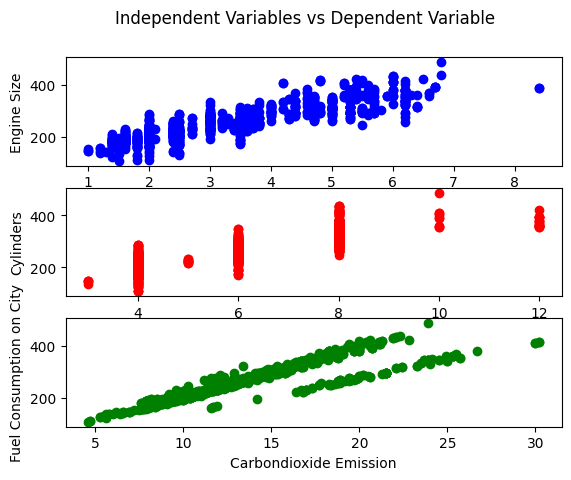

In [19]:
fig, (axs0, axs1, axs2) = plt.subplots(3, 1)
fig.suptitle("Independent Variables vs Dependent Variable")

axs0.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
axs0.set_ylabel("Engine Size")

axs1.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="red")
axs1.set_ylabel("Cylinders")

axs2.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color="green")
axs2.set_ylabel("Fuel Consumption on City")
axs2.set_xlabel("Carbondioxide Emission")


## 3.SPLITTING THE DATASET

    *Splitting the dataset into training and test sets.
    *85% of the dataset will be training set.

In [25]:
mask = np.random.rand(len(df)) < 0.85

train = cdf[mask]
test = cdf[~mask]

## 4.CREATING and EVALUATING the MODEL

    *Simple and multiple linear regression model using sklearn.
    *Training the model using the dataset.
    *Getting R2 and variance scores of several models created.

Firstly we create a simple linear regression model.

Text(0, 0.5, 'Emission')

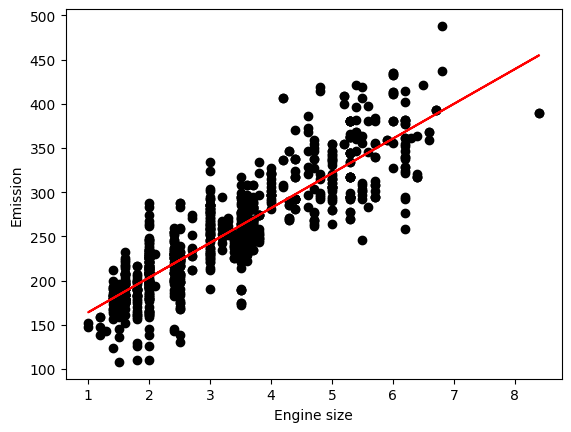

In [26]:
model = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE']])
y = np.asanyarray(train[['CO2EMISSIONS']])

model.fit(x, y)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='black')
plt.plot(x, model.coef_[0][0]*x + model.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [27]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = model.predict(test_x)

print("Mean Squared Error: %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean Squared Error: 881.26
R2-score: 0.77


Now we are going to create several multiple regression models.

In [23]:
#First Multiple Model
model = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']])
y = np.asanyarray(train[['CO2EMISSIONS']])

model.fit(x, y)

y_hat= model.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Mean Squared Error: %.2f" % np.mean((y_hat - y) ** 2))
print("R2 score: %.2f" %r2_score(y, y_hat))

Mean Squared Error: 521.73
R2 score: 0.85


c:\Users\sairb\anaconda3\envs\levi\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


When we trained our model with three features, Let's try with more features available.

In [11]:
#Second Multiple Model
model = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY']])
y = np.asanyarray(train[['CO2EMISSIONS']])

model.fit(x, y)

y_hat= model.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Mean Squared Error: %.2f" % np.mean((y_hat - y) ** 2))
print("R2 score: %.2f" %r2_score(y, y_hat))

Mean Squared Error: 558.99
R2 score: 0.86


c:\Users\sairb\anaconda3\envs\levi\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


5.CONCLUSIONS

    *Both multiple linear regression models perform better than the simple model.
    *Among the multiple linear regression models, the first one performs the best.